In [1]:
import pathlib

import pandas as pd
import numpy as np
import pymc3 as pm

import matplotlib.pyplot as pl
import arviz as az

In [2]:
pm.__version__, az.__version__

('3.7', '0.4.1')

In [3]:
datapath = pathlib.Path.cwd() / 'Data/Run01_20190610/Run01_20190610/'

In [4]:
datapath.exists()

True

In [5]:
list(datapath.glob('*.csv'))

[PosixPath('/accounts/ekarakoy/PROJECTS/PRI/Data/Run01_20190610/Run01_20190610/Samples01_mix_std_Rrs_mixedIOPs.csv'),
 PosixPath('/accounts/ekarakoy/PROJECTS/PRI/Data/Run01_20190610/Run01_20190610/Samples01_synthetic_mix_validation.csv'),
 PosixPath('/accounts/ekarakoy/PROJECTS/PRI/Data/Run01_20190610/Run01_20190610/Species01_std_Rrs.csv')]

In [6]:
df_mix = pd.read_csv(datapath / 'Samples01_mix_std_Rrs_mixedIOPs.csv')
df_mix_valid = pd.read_csv(datapath / 'Samples01_synthetic_mix_validation.csv')
df_rrs = pd.read_csv(datapath / 'Species01_std_Rrs.csv')

In [7]:
df_mix.set_index('wv', inplace=True)

In [8]:
df_mix.head()

,sample1,sample2,sample3,sample4,sample5,sample6
wv,,,,,,
413,2.438076,2.034605,1.544007,1.335612,1.151216,1.265875
415,2.402384,2.016595,1.538197,1.333720,1.146920,1.258342
417,2.346384,1.988013,1.527993,1.330230,1.144669,1.253873
419,2.289793,1.963064,1.530595,1.337124,1.153951,1.259373
421,2.228069,1.935900,1.535812,1.344429,1.162782,1.263895


In [9]:
df_mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 413 to 661
Data columns (total 6 columns):
sample1    125 non-null float64
sample2    125 non-null float64
sample3    125 non-null float64
sample4    125 non-null float64
sample5    125 non-null float64
sample6    125 non-null float64
dtypes: float64(6)
memory usage: 6.8 KB


In [10]:
df_mix_valid.set_index('taxon', inplace=True)

df_mix_valid

,sample1,sample2,sample3,sample4,sample5,sample6
taxon,,,,,,
Ehux,0.00,0.00,0.00,0.05,0.10,0.35
Pela,0.03,0.10,0.15,0.07,0.08,0.09
Pro,0.91,0.71,0.12,0.05,0.00,0.00
Syn,0.01,0.03,0.48,0.10,0.00,0.00
Tetr,0.05,0.16,0.20,0.43,0.17,0.12
Thal,0.00,0.00,0.05,0.30,0.65,0.44


In [11]:
df_mix_melt = df_mix.melt(var_name='sample_name')

In [12]:
df_mix_melt.sample_name.unique()

array(['sample1', 'sample2', 'sample3', 'sample4', 'sample5', 'sample6'],
      dtype=object)

In [13]:
df_mix_melt.insert(1, 'sample_id',
                   pd.Categorical(df_mix_melt.sample_name,
                                 categories = df_mix_melt.sample_name.unique()).codes)

In [14]:
df_mix_melt.head()

,sample_name,sample_id,value
0,sample1,0,2.438076
1,sample1,0,2.402384
2,sample1,0,2.346384
3,sample1,0,2.289793
4,sample1,0,2.228069


In [15]:
df_rrs.set_index('wv', inplace=True)

In [16]:
df_rrs.head()

,Ehux,Pela,Pro,Syn,Tetr,Thal
wv,,,,,,
413,1.651996,1.145520,2.717057,1.662198,1.453781,1.034611
415,1.631211,1.137570,2.664387,1.654245,1.461299,1.030149
417,1.615034,1.138264,2.582348,1.635990,1.459917,1.028172
419,1.604684,1.144057,2.496268,1.639646,1.466737,1.039697
421,1.591264,1.152988,2.403929,1.648563,1.475307,1.050499


In [17]:
df_rrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 413 to 661
Data columns (total 6 columns):
Ehux    125 non-null float64
Pela    125 non-null float64
Pro     125 non-null float64
Syn     125 non-null float64
Tetr    125 non-null float64
Thal    125 non-null float64
dtypes: float64(6)
memory usage: 6.8 KB


In [18]:
df_rrs.describe()

,Ehux,Pela,Pro,Syn,Tetr,Thal
count,1.250000e+02,125.000000,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02
mean,1.599997e-11,0.000000,1.600001e-11,4.000001e-11,-4.000001e-11,2.400000e-11
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.197695e+00,-1.263785,-8.070467e-01,-9.929743e-01,-1.112173e+00,-1.381325e+00
25%,-1.069704e+00,-1.116486,-7.774929e-01,-9.285415e-01,-1.015618e+00,-1.164459e+00
50%,-1.707715e-01,-0.093040,-5.123335e-01,-4.555125e-01,-3.043449e-01,4.829575e-02
75%,1.007499e+00,1.165374,6.720772e-01,1.105660e+00,1.154382e+00,1.089664e+00
max,1.651996e+00,1.262999,2.717057e+00,1.662198e+00,1.523652e+00,1.232523e+00


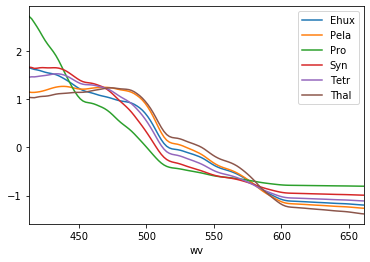

In [19]:
df_rrs.plot();

In [20]:
print('mix\n', df_mix.head(2), '\n','-' *70, '\nmix_valid', df_mix_valid.head(2),
      '\n','-'*70,'\nrrs', df_rrs.head(2))

mix
       sample1   sample2   sample3   sample4   sample5   sample6
wv                                                             
413  2.438076  2.034605  1.544007  1.335612  1.151216  1.265875
415  2.402384  2.016595  1.538197  1.333720  1.146920  1.258342 
 ---------------------------------------------------------------------- 
mix_valid        sample1  sample2  sample3  sample4  sample5  sample6
taxon                                                      
Ehux      0.00      0.0     0.00     0.05     0.10     0.35
Pela      0.03      0.1     0.15     0.07     0.08     0.09 
 ---------------------------------------------------------------------- 
rrs          Ehux     Pela       Pro       Syn      Tetr      Thal
wv                                                            
413  1.651996  1.14552  2.717057  1.662198  1.453781  1.034611
415  1.631211  1.13757  2.664387  1.654245  1.461299  1.030149


In [21]:
df_true_mix = df_rrs.dot(df_mix_valid)

In [22]:
df_sample_1 = df_rrs * df_mix_valid.sample1
df_sample_1.head()

,Ehux,Pela,Pro,Syn,Tetr,Thal
wv,,,,,,
413,0.0,0.034366,2.472522,0.016622,0.072689,0.0
415,0.0,0.034127,2.424592,0.016542,0.073065,0.0
417,0.0,0.034148,2.349937,0.016360,0.072996,0.0
419,0.0,0.034322,2.271604,0.016396,0.073337,0.0
421,0.0,0.034590,2.187575,0.016486,0.073765,0.0


In [23]:
df_sample_1.cumsum(axis=1).head()

,Ehux,Pela,Pro,Syn,Tetr,Thal
wv,,,,,,
413,0.0,0.034366,2.506888,2.523510,2.596199,2.596199
415,0.0,0.034127,2.458719,2.475261,2.548326,2.548326
417,0.0,0.034148,2.384085,2.400445,2.473441,2.473441
419,0.0,0.034322,2.305926,2.322322,2.395659,2.395659
421,0.0,0.034590,2.222165,2.238650,2.312416,2.312416


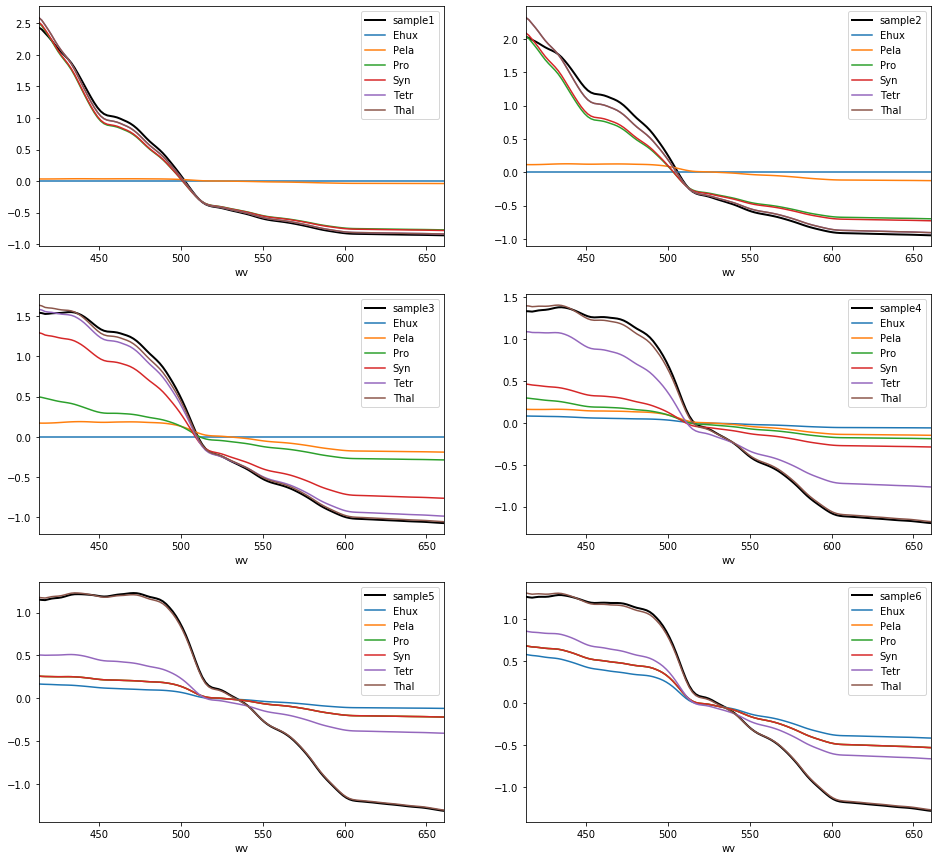

In [24]:
f, axs = pl.subplots(nrows=3, ncols=2, figsize=(16, 15))
df_mix.plot(subplots=True, ax=axs, color='k', lw=2);
for ax, sample in zip(axs.ravel(), df_mix.columns):
    df_cumsum = (df_rrs * df_mix_valid[sample]).cumsum(axis=1)
    df_cumsum.plot(ax=ax)

### <u>Sample1</u>

In [25]:
with pm.Model() as m_sample1:
    α = pm.Dirichlet('α', np.ones(df_rrs.shape[1]))
    μ = pm.math.dot(df_rrs, α)
    σ = pm.Exponential('σ', 1)
    mdl_mix_rrs_1 = pm.Normal('mdl_mix_rrs_1', mu=μ, sd=σ, observed=df_mix.sample1)

In [26]:
render = pm.model_to_graphviz(m_sample1)
render.format = 'png'
render.render('run_1_sample_1_model', directory='./')

'./run_1_sample_1_model.png'

<img src='./run_1_sample_1_model.png' />

In [27]:
with m_sample1:
    trace=pm.sample(tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, α]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:10<00:00, 956.55draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


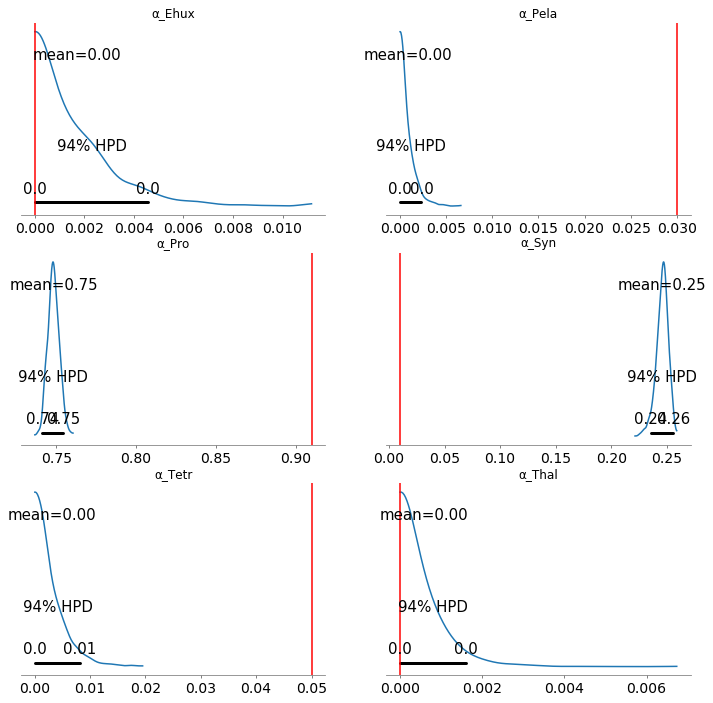

In [59]:
f, axs = pl.subplots(3, 2, figsize=(12, 12))
axs = pm.plot_posterior(trace, var_names=['α'], ax=axs, round_to=2,)
for ax, crit in zip(axs.flatten(), df_rrs.columns):
    ax.set_title(f'α_{crit}')
    ax.axvline(x=df_mix_valid.loc[crit, 'sample1'], color='r')

In [60]:
df_mix_valid

,sample1,sample2,sample3,sample4,sample5,sample6
taxon,,,,,,
Ehux,0.00,0.00,0.00,0.05,0.10,0.35
Pela,0.03,0.10,0.15,0.07,0.08,0.09
Pro,0.91,0.71,0.12,0.05,0.00,0.00
Syn,0.01,0.03,0.48,0.10,0.00,0.00
Tetr,0.05,0.16,0.20,0.43,0.17,0.12
Thal,0.00,0.00,0.05,0.30,0.65,0.44


In [107]:
df_mix.head()

,sample1,sample2,sample3,sample4,sample5,sample6
wv,,,,,,
413,2.438076,2.034605,1.544007,1.335612,1.151216,1.265875
415,2.402384,2.016595,1.538197,1.333720,1.146920,1.258342
417,2.346384,1.988013,1.527993,1.330230,1.144669,1.253873
419,2.289793,1.963064,1.530595,1.337124,1.153951,1.259373
421,2.228069,1.935900,1.535812,1.344429,1.162782,1.263895


In [35]:
def run_model(sample):
    n_critters = df_rrs.shape[1]
    with pm.Model() as m_:
        α = pm.Dirichlet('α', np.ones(n_critters))
        μ = pm.math.dot(df_rrs, α)
        σ = pm.Exponential('σ', 1)
        mdl_mix_rrs_1 = pm.Normal('mdl_mix_rrs_1', mu=μ, sd=σ, 
                                  observed=df_mix[sample])
        trace = pm.sample(tune=2000)
    return trace

def plot_posterior(trace, sample):
    f, axs = pl.subplots(3, 2, figsize=(12, 12))
    axs = pm.plot_posterior(trace, var_names=['α'], ax=axs, round_to=2,)
    for ax, crit in zip(axs.flatten(), df_rrs.columns):
        ax.set_title(f'α_{crit}')
        ax.axvline(x=df_mix_valid.loc[crit, sample], color='r')

In [33]:
trace_4 = run_model('sample4')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, α]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:10<00:00, 987.72draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


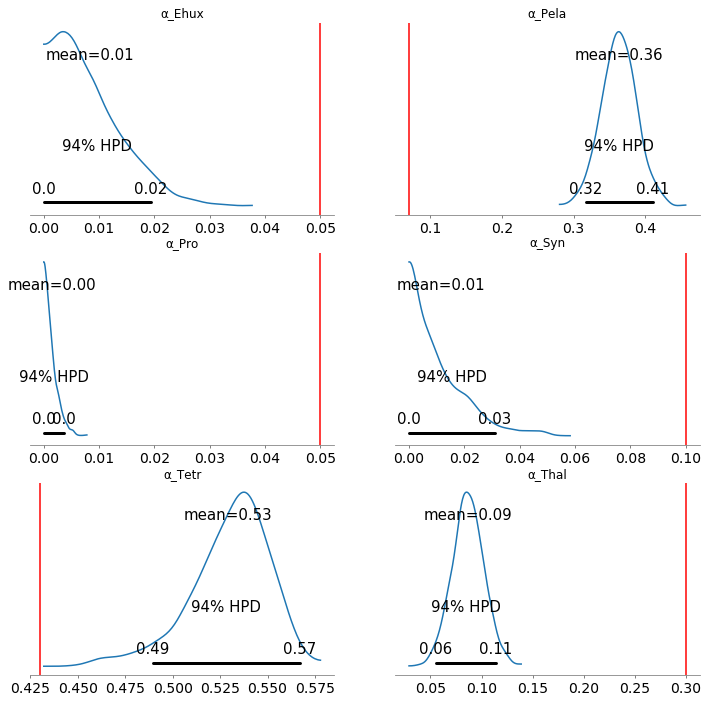

In [36]:
plot_posterior(trace_4, 'sample4')